In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer(as_frame=True)
dataset

{'data':      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 0          17.99         10.38          122.80     1001.0          0.11840   
 1          20.57         17.77          132.90     1326.0          0.08474   
 2          19.69         21.25          130.00     1203.0          0.10960   
 3          11.42         20.38           77.58      386.1          0.14250   
 4          20.29         14.34          135.10     1297.0          0.10030   
 ..           ...           ...             ...        ...              ...   
 564        21.56         22.39          142.00     1479.0          0.11100   
 565        20.13         28.25          131.20     1261.0          0.09780   
 566        16.60         28.08          108.30      858.1          0.08455   
 567        20.60         29.33          140.10     1265.0          0.11780   
 568         7.76         24.54           47.92      181.0          0.05263   
 
      mean compactness  mean concavity  me

In [ ]:
dataset['data'].head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
dataset['data'].shape

(569, 30)

In [ ]:
dataset['target'].head()

,target
0,0
1,0
2,0
3,0
4,0


In [3]:
dataset['target'].value_counts()

NameError: name 'dataset' is not defined

In [5]:
x = dataset['data']
y = dataset['target']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler
ss_train = StandardScaler()
x_train = ss_train.fit_transform(x_train)
ss_test = StandardScaler()
x_test = ss_train.transform(x_test)

In [10]:
from sklearn.preprocessing import StandardScaler

ss_train = StandardScaler()

x_train = ss_train.fit_transform(x_train)

ss_test = StandardScaler()

x_test = ss_train.transform(x_test)

In [12]:
from sklearn.linear_model import LogisticRegression

logistic_classifier = LogisticRegression()

logistic_classifier.fit(x_train, y_train)

LogisticRegression()

In [13]:
y_pred = logistic_classifier.predict(x_test)

print (y_pred[0:5])

print (y_test [0:5])

[1 0 0 1 1]
204    1
70     0
131    0
431    1
540    1
Name: target, dtype: int64


In [16]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)



TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

print ('True Positive (TP) ', TP)

print ('True Negative (TN)',TN)

print ('False Positive(FP) ',FP)

print ('False Negative(FN) ',FN)

True Positive (TP)  87
True Negative (TN) 53
False Positive(FP)  1
False Negative(FN)  2


In [17]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("Logistic Regression's Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Logistic Regression's Accuracy:  0.9790209790209791


In [19]:
# another way to fing accuracy
accuracy=(TP + TN) / (TP + TN + FP + FN)
print("Logistic Regression's Accuracy: {:0.3f}".format(accuracy))

Logistic Regression's Accuracy: 0.979


In [23]:
models={}
#Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression']=LogisticRegression()
# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] =LinearSVC()
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
models['Decision Tree']=DecisionTreeClassifier()
#Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest']=RandomForestClassifier()
# Navie Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes']= GaussianNB()
#K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()
models

{'Logistic Regression': LogisticRegression(),
 'Support Vector Machines': LinearSVC(),
 'Decision Tree': DecisionTreeClassifier(),
 'Random Forest': RandomForestClassifier(),
 'Naive Bayes': GaussianNB(),
 'K-Nearest Neighbor': KNeighborsClassifier()}

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy, precision, recall={},{},{}
for key in models.keys():
    #fit the classifier
    models[key].fit(x_train, y_train)
    #Make prediction
    predictions=models [key].predict(x_test)
    #Calculate Accuracy
    accuracy[key] = accuracy_score(predictions, y_test)
    precision [key] = precision_score(predictions, y_test)
    recall[key]=recall_score(predictions, y_test)

In [36]:
import pandas as pd
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy']=accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall']=recall.values()
df_model

,Accuracy,Precision,Recall
Logistic Regression,0.979021,0.977528,0.988636
Support Vector Machines,0.965035,0.955056,0.988372
Decision Tree,0.937063,0.932584,0.965116
Random Forest,0.972028,0.988764,0.967033
Naive Bayes,0.951049,0.955056,0.965909
K-Nearest Neighbor,0.958042,0.966292,0.966292


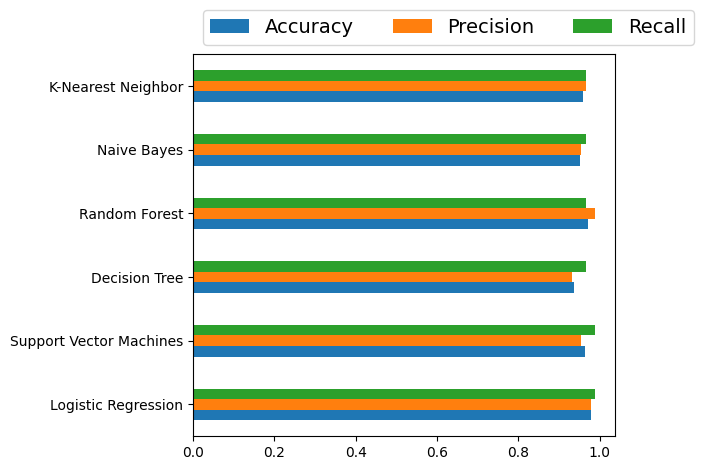

In [38]:
ax = df_model.plot.barh()
ax.legend(
ncol=len(models.keys()),
bbox_to_anchor=(0, 1),
loc='lower left',
prop={'size': 14}
)
plt.tight_layout()
